<a href="https://colab.research.google.com/github/Karen-Gas/gittest/blob/master/%E1%83%93%E1%83%90%E1%83%95%E1%83%90%E1%83%9A%E1%83%94%E1%83%91%E1%83%901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

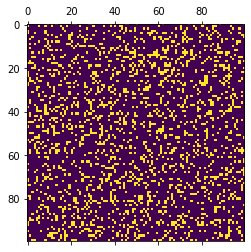

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

N = 100
ON = 300
OFF = 0
vals = [ON, OFF]


grid = np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)
#print(grid)
def update(data):
  global grid
  # copy grid since we require 8 neighbors for calculation
  # and we go line by line 
  newGrid = grid.copy()

  #print(grid)
  for i in range(N):
    for j in range(N):
      # compute 8-neghbor sum 
      # using toroidal boundary conditions - x and y wrap around 
      # so that the simulaton takes place on a toroidal surface.
      total = (grid[i, (j-1)%N] + grid[i, (j+1)%N] + 
               grid[(i-1)%N, j] + grid[(i+1)%N, j] + 
               grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] + 
               grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/300
      
      # apply Conway's rules
      print(grid[i,j])
      if grid[i, j]  == ON:

        if (total < 2) or (total > 3):
          newGrid[i, j] = OFF
      else:
        if total == 3:
          newGrid[i, j] = ON
  print(total)        
  # update data
  mat.set_data(newGrid)
  grid = newGrid
  return [mat]

fig, ax = plt.subplots()


mat = ax.matshow(grid)
